# 2d logistic regression scratchpad 

In [4]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append('/Users/outrageous/Workspace/Metis_MachineLearningCourse/chi17_ml1/level_2/utils')            # append our utility names
%matplotlib inline

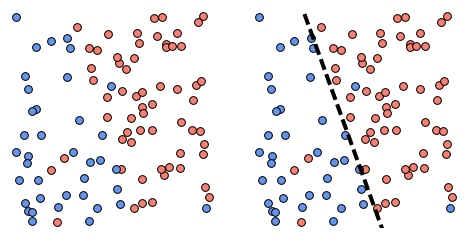

In [5]:
# load in the data and labels
data = np.asarray(pd.read_csv('/Users/outrageous/Workspace/Metis_MachineLearningCourse/chi17_ml1/level_2/datasets/classif_2class_linear_data.csv'))
x = data[:,:-1]
y = data[:,-1]

# load in the true polynomial separator
true_func = np.asarray(pd.read_csv('/Users/outrageous/Workspace/Metis_MachineLearningCourse/chi17_ml1/level_2/datasets/classif_2class_linear_func.csv'))

# plot the data and true underlying data-generating function
import classification_level_1_utils as utils  # a set of simple plotting utilities for this notebook
utils.classify_cust_plt_util(x,y,true_func)
plt.show()

# logistic regression functionality

TODO: put in your logistic regression functionality below and run it on the above dataset!  Then plot the resulting boundary using the Python cell in the next section.

In [9]:
# set inputs to grad descent
alpha = 10**-2
K = 200
w = np.random.randn(np.shape(x)[1] + 1,1);        # random initial point
def grad_descent(x,y,alpha,K):
    # initial point
    w = np.random.randn(np.shape(x)[1]+1,1)
    
    # container for weight history
    whist = []
    for j in range(K):
        # compute current cost value an store
        g = compute_costval(x,y,w)
        whist.append(w)

        # compute grad
        grad = compute_gradient(x,y,w)
        
        # take descent step
        w = w - alpha*grad
    
    return whist


# run gradient descent
whist = grad_descent(x,y,w,alpha,K)

TypeError: grad_descent() takes exactly 4 arguments (5 given)

In [7]:
# print out the cost history
ghist = []
for k in range(K):
    w_k = whist[k]
    g_k = compute_cost_val(x,y,w_k)
    ghist.append(g_k)
plt.plot(ghist)
plt.show()

NameError: name 'whist' is not defined

## Plot your learned boundary!

You shouldn't need to do anything in order for the next Python cell - which plots the learned boundary on the dataset - to work.  Except - of course - successfully running gradient descent for logistic regression.

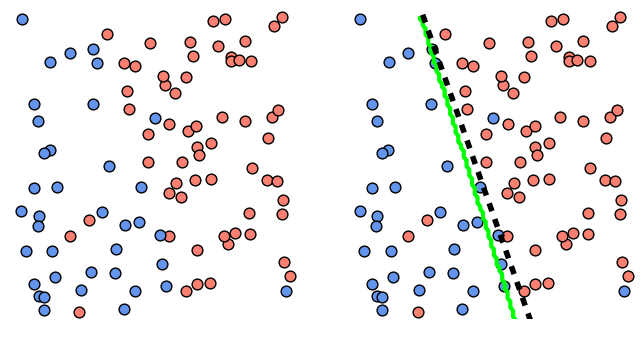

In [13]:
# print out the classifier boundary
utils.classify_cust_plt_util(x,y,true_func)

### print out boundary ###
# create plotting range
r = np.linspace(-2,2,100)

# create grid from plotting range
xx,yy= np.meshgrid(r,r)
xx.shape = (len(r)**2,1)
yy.shape = (len(r)**2,1)

# produce plane
w = whist[-1]
t = np.sign(w[0] + w[1]*xx + w[2]*yy)

# plot cost surface
xx.shape = (len(r),len(r))
yy.shape = (len(r),len(r))
t.shape = (len(r),len(r))
plt.contour(xx,yy,t,colors = 'lime',linewidths = 3,levels = [0])
plt.show()